In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import mplcyberpunk
from functions import nth_derivative
from tqdm import tqdm

In [3]:
plt.style.use('cyberpunk')
#mplcyberpunk.make_lines_glow()

In [9]:
for i in tqdmm(range(10000000), desc="Training", unit="iter", ncols=100):
    1+1

Training: 100%|██████████████████████████████████| 10000000/10000000 [00:02<00:00, 3553500.24iter/s]


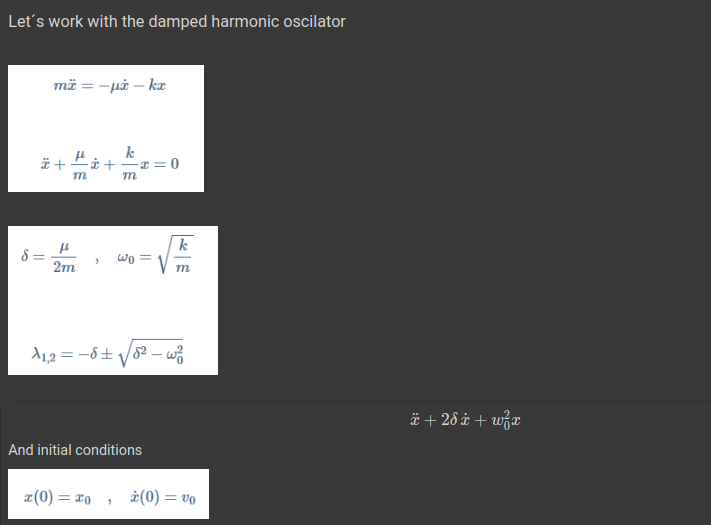

#### The architecture of the ANN

In this case, the imputs of the network are: the time $t$ and the initial condition $x_0$.

And the outputs: $ANN$ and $x_0$

The reparametrization for this Neuman problem is then:

$$\hat{x}(t,\theta) = x_0 + (t - t_0)\dot{x}_0 + \left(1 - e^{(t-t_0)} \right)^2 ANN_1(t)$$

#### The Differential Equation

In [10]:
#1 Define the fucntion that describes the differential equation F(t;x,x',...)=0
def oscilador(net,t):
    return nth_derivative(net, t, 2) + 2*delta*nth_derivative(net, t, 1) + w0**2 * net(t)

#### The real solution and the parameters of the problem

In [11]:
mu=1
m=1
k=4.0
delta=mu/(2*m)
w0=np.sqrt(k/m)

x0=1
v0=0

def sol(t):
  A=-x0/2
  phi=2*np.pi
  return np.exp(-delta*t) * 2*A*np.cos(phi + w0*t)

def pend(x, t, delta, w0):
    theta, omega = x
    dxdt = [omega, -2*delta*omega - w0**2*theta]
    return dxdt
ti=0
tf=10
t=np.linspace(ti,tf,300)    
y0 = [x0, v0]
sol = odeint(pend, y0, t, args=(delta, w0))

In [12]:
#1 Definir la estructura de la red
nodos=40
ANN = nn.Sequential(nn.Linear(2, nodos), nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    nn.Tanh(),nn.Linear(nodos,2))
print(ANN)

Sequential(
  (0): Linear(in_features=2, out_features=40, bias=True)
  (1): Tanh()
  (2): Linear(in_features=40, out_features=40, bias=True)
  (3): Tanh()
  (4): Linear(in_features=40, out_features=2, bias=True)
)


#### Its re-parametrization

In [96]:
# Now the re-parametrization of the network, depends on the initial conditions
def ReParam(t,net=ANN):
    a=(t-ti)*v0
    b=(1-torch.exp(ti-t))**2
    return t[1] + a + b*net(t)[0]

In [97]:
#Now the cost function
def cost(t):
    t.requires_grad=True
    #calculamos una salida de la red

    return torch.linalg.norm(oscilador(ReParam,t))

In [98]:
#4 Error and optimizer
learning_rate=0.01
epocas=20000

#optimizer=torch.optim.SGD(ANN.parameters(),lr=learning_rate,momentum=0.9)
optimizer=optimizer = torch.optim.Adam(ANN.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adadelta(ANN.parameters(), lr=learning_rate)

In [99]:
#5 el intervalo que queremos para x
puntos=80
x = torch.linspace(0,10,puntos)
x=x.reshape(puntos,1)

época=19999.00 , loss=0.49


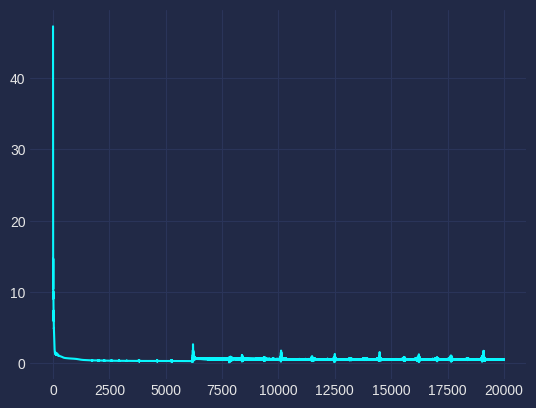

In [100]:
#loop de entrenamiendo 
errores=[]
for i in range(epocas):
    l=cost(x) #coste
    l.backward() #gradiente
    optimizer.step() #se actualizan los parámetros
    optimizer.zero_grad() #vacíamos el gradiente
    #print('época=%.2f , loss=%.2f'%(i,l))
    errores.append(float(l))
print('época=%.2f , loss=%.2f'%(i,l))
plt.plot(range(epocas),errores)


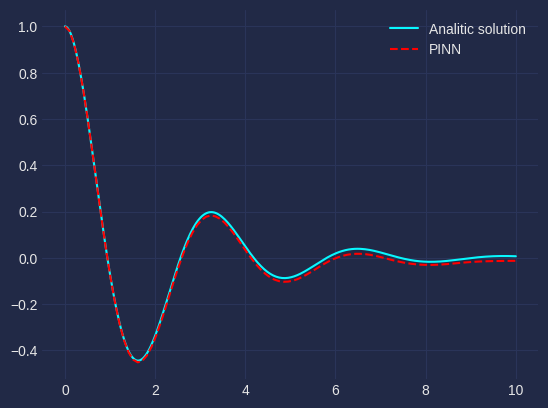

In [102]:
x = torch.linspace(0,10,100)
x=x.reshape(100,1)

#plt.plot(x,x**2,'ro')
plt.plot(t,sol[:,0], label='Analitic solution')
plt.plot(x,ReParam(x,net=ANN).detach().numpy(),'--r', label='PINN')
plt.legend()
#mplcyberpunk.make_lines_glow()

---
#### If the initial condition changes:



In [103]:
mu=1
m=1
k=4.0
delta=mu/(2*m)
w0=np.sqrt(k/m)

x0=2
v0=0

def sol(t):
  A=-x0/2
  phi=2*np.pi
  return np.exp(-delta*t) * 2*A*np.cos(phi + w0*t)

def pend(x, t, delta, w0):
    theta, omega = x
    dxdt = [omega, -2*delta*omega - w0**2*theta]
    return dxdt
ti=0
tf=10
t=np.linspace(ti,tf,300)    
y0 = [x0, v0]
sol = odeint(pend, y0, t, args=(delta, w0))

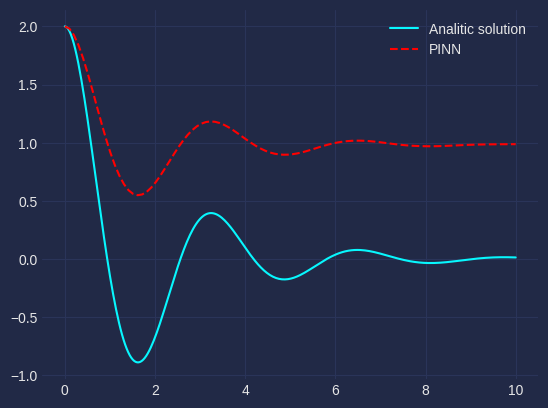

In [104]:
x = torch.linspace(0,10,100)
x=x.reshape(100,1)

#plt.plot(x,x**2,'ro')
plt.plot(t,sol[:,0], label='Analitic solution')
plt.plot(x,ReParam(x,net=ANN).detach().numpy(),'--r', label='PINN')
plt.legend()
#mplcyberpunk.make_lines_glow()